# Clustering of job listings

We want to do some unsupervised learning to cluster the job postings to potentially extract some insights

In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
data_path = os.path.join("..", "data", "Jobsdb.xlsx")
df = pd.read_excel(data_path)

In [56]:
df.head()

,job-title,company,location,Job description,url,date
0,Data Analyst,Lecca Group,Geylang,Job description\n\n1. Work with management to ...,https://sg.jobsdb.com/job/Data-Analyst-3e8cd5e...,2022-10-14 11:06:40.398900
1,Data Analyst,Evolve Family Office,Downtown Core,Evolve Family Office is looking for a Data Ana...,https://sg.jobsdb.com/job/Data-Analyst-78b1a7c...,2022-09-30 11:06:40.398954
2,Analyst,aAdvantage Consulting Group Pte Ltd,Bukit Merah,Our Mission is “Partnering You in Organisation...,https://sg.jobsdb.com/job/Analyst-903623d606be...,2022-10-13 11:06:40.398973
3,Data Engineer,Rapsys Technologies Pte Ltd,Rochor,Grow and develop data infrastructure\nDesign a...,https://sg.jobsdb.com/job/Data-Engineer-9b1edb...,2022-10-12 11:06:40.398991
4,Junior Data Analyst / Scientist,Dun & Bradstreet,Central Singapore,"Responsibilities:\n\nPerform data cleaning, pr...",https://sg.jobsdb.com/job/Junior-Data-Analyst-...,2022-10-13 11:06:40.399008


In [57]:
print(df["Job description"][0])

Job description

1. Work with management to prioritize business and information needs in Data Analytics
2. Play critical role in interpreting data, analysing results, and formulating trend forecasting methodologies
3. Develop processes and tools to monitor and analyse model performance and data accuracy
4. Assess the effectiveness and accuracy of new data sources and data gathering techniques
5. Contribute to the continuous development and management of data analytics systems, techniques, and processes to improve efficiency and quality
Job Requirements:
· Diploma/Degree in Statistics, Data Science, Data Analytics, Computer Science or equivalent
· Minimum 2 years of experience in Data Analytics or related field
· Strong analytical mindset with excellent analytical, logical, reasoning and problem-solving skills.
· Attention to detail as data analysis and reporting must be precise
· Ability to work independently and in a team


In [9]:
additional_stopwords = ["job", "description", "requirements"]

## Keyword extraction

### Yet Another Keyword Extractor (YAKE)

In [10]:
import yake

In [144]:
kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
keywords = kw_extractor.extract_keywords(df["Job description"][0])
for kw, v in keywords:
    print("Keyphrase: ",kw, "| score:", v)

Keyphrase:  Data Analytics | score: 0.020751756607893863
Keyphrase:  Data | score: 0.028059506540739857
Keyphrase:  Analytics | score: 0.06828786920230936
Keyphrase:  data analytics systems | score: 0.06973877618324936
Keyphrase:  Job description | score: 0.07782287031703022
Keyphrase:  Data Science | score: 0.10955905991476128
Keyphrase:  data gathering techniques | score: 0.14566971962386957
Keyphrase:  Computer Science | score: 0.1461386284283184
Keyphrase:  Degree in Statistics | score: 0.15112749894333427
Keyphrase:  data accuracy | score: 0.164306300249505


## Process job descriptions

In [34]:
def tokenize_sentence(description):
    return word_tokenize(description)

In [ ]:
def lowercase(tokens)

In [41]:
def remove_stopwords(tokens, stopwords):
    return [token for token in tokens if token not in stopwords]

In [ ]:
def process_description(description):
    tokens = word_tokenize(description)
    

## Clustering

### TF-IDF & K-means

In [79]:
def get_tfidf(description):
    vectorizer = TfidfVectorizer(stop_words={'english'})
    tfidf = vectorizer.fit_transform(description)
    return tfidf

In [106]:
def plot_kmeans(tfidf, min_K=2, max_K=10):
    sum_of_squared_distances = []

    for k in range(min_K, max_K):
        km = KMeans(n_clusters=k, max_iter=200, n_init=10)
        km = km.fit(tfidf)
        sum_of_squared_distances.append(km.inertia_)

    plt.plot(range(min_K, max_K), sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [127]:
def get_clusters(k):
    model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels = model.labels_
    # clusters = pd.DataFrame(list(zip(df["job-title"], labels)), columns=['title','cluster'])
    # print(clusters.sort_values(by=['cluster']))
    
    result = {'cluster':labels, "job title":df["job-title"], 'description':df['Job description']}
    return pd.DataFrame(result)

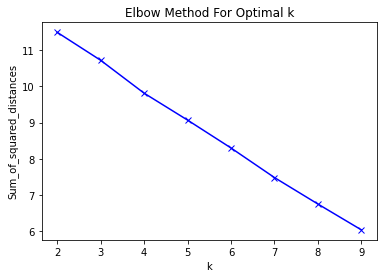

In [128]:
tfidf = get_tfidf(df["Job description"])
plot_kmeans(tfidf)

In [129]:
num_clusters = 4
df_cluster = get_clusters(num_clusters)

Cluster: 0
Titles:
Data analyst
Junior Data Analyst (MNC/UP to $3K/ 3 - 6 months) no exp ok!


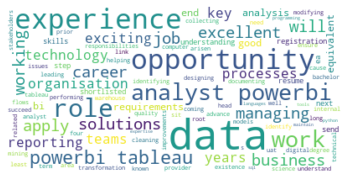

Cluster: 1
Titles:
Data Analyst
Analyst
Data Engineer
Data Analyst - Growth #Immediate
Data Analyst Compliance
Data Analyst (Ref 24823)


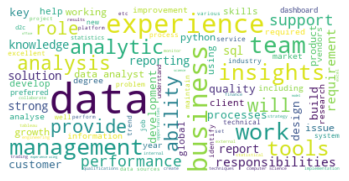

Cluster: 2
Titles:
Data analyst


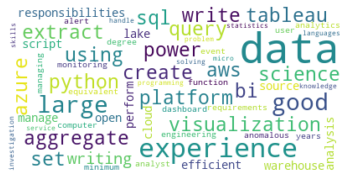

Cluster: 3
Titles:
Junior Data Analyst / Scientist
Data Analyst


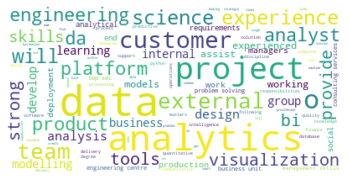

In [143]:
for k in range(0, num_clusters):
    s = df_cluster[df_cluster.cluster == k]
    text = s["description"].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    titles = df_cluster[df_cluster.cluster==k]['job title']
    
    print('Cluster: {}'.format(k))
    print('Titles:')
    print("\n".join(titles.unique()))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()